# **Spotify Recommendation System**

### Install Libraries

In [1]:
# Basic Data Science Library
import numpy as np
import pandas as pd
pd.set_option('max_columns', None) # change panda settings to display all columns
import seaborn as sb
import plotly.express as px
from yellowbrick.target import FeatureCorrelation
import matplotlib.pyplot as plt 
sb.set() 

# Libraries to aid data visualization and analysis
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from yellowbrick.target import FeatureCorrelation

# Libraries for Feature Engineering and Machine Learninfg
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler

# Other Essential Package
import re
import itertools

### Initial Dataset

Source: https://www.kaggle.com/code/vatsalmavani/music-recommendation-system-using-spotify-dataset/data 

Throughout this project, we used 2 data set. Both dataset have the complete sound characteristic of the song. However, both data set does not have the complete information to create the recommendation system. Song_df have the song names and ids, but not their genres. Therefore, we need genres_df to gather the genres information of each song.

**Data Description**

Name	        : Song title<br>
artist	        : Song artist<br>
year	        :Year of the release<br>
Release Date	: The date in which a release was made available for public use<br>
ID	            : The Spotify ID for the track<br>
genre_list	    : Genre of the song<br>
duration_ms	    : The duration of the track in milliseconds.<br>
popularity	    : The popularity of the song <br>
explicit	    : Explicit detects songs one that has curse words or language or art that is generally deemed sexual, violent, or offensive in nature. 1 indicates that the song is explicit<br>
tempo	        : The overall estimated tempo of a track in beats per minute (BPM)<br>
key	            : The dominant key signatur of the track. For example, 1 being C Major / A Minor and 4 being Eb Major / C Minor<br>
mode	        : Mode indicates the modality (major or minor) of a track. 0 indicates Minor key and 1 indicates Major key<br>
acousticness	: A confidence measure from 0.0 to 1.0 of whether the track is acoustic<br>
danceability	: Danceability describes how suitable a track is for dancing<br>
energy	        : Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity<br>
instumentalness	: Predicts whether a track contains no vocals. The closer to one, the more confidence level of the track has no vocal<br>
liveness	    : Higher liveness values represent an increased probability that the track was performed live. The closer to one, the more confidence level of the track was performed live<br>
loudness	    : The overall loudness of a track in decibels (dB)<br>
speechiness	    : Speechiness detects the presence of spoken words in a track<br>
valence	        : A measure from 0.0 to 1.0 describing the musical positiveness (degree of happiness feeling) conveyed by a track<br>





In [2]:
song_df = pd.read_csv('data.csv')
song_df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [3]:
genre_df = pd.read_csv('data_w_genres.csv')
genre_df.head()

,genres,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
0,['show tunes'],"""Cats"" 1981 Original London Cast",0.590111,0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5,1,9
1,[],"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5,1,26
2,[],"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0,1,7
3,[],"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0,1,27
4,[],"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5,1,7


### Data Cleaning & Preparation

##### 1. Fixing Data Formats

In [4]:
song_df.dtypes

valence             float64
year                  int64
acousticness        float64
artists              object
danceability        float64
duration_ms           int64
energy              float64
explicit              int64
id                   object
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
name                 object
popularity            int64
release_date         object
speechiness         float64
tempo               float64
dtype: object

The result from code below is the (generalized) categorical variable which must be processed before we can do operation on them and the numerical data.

We will not change the id as it is the parameter in which we can access the song from spotify. Also, it is a random code from spotify that is assign to each song that is in spotify

In [5]:
print(song_df.loc[:,song_df.dtypes==object].columns)
print(genre_df.loc[:,genre_df.dtypes==object].columns)

Index(['artists', 'id', 'name', 'release_date'], dtype='object')
Index(['genres', 'artists'], dtype='object')


The 'genre' column in genre_df was actually a string instead of list of (categorical) strings. This is proved by generating the [0][0] value of the dataframe. Therefore, we need to transform each data in the column into lists of string. This is done by encorporating regular expression.

In [6]:
print(genre_df['genres'].values[0])
print(genre_df['genres'].values[0][0])

['show tunes']
[


In [7]:
genre_df['genres_upd'] = genre_df['genres'].apply(lambda x: re.findall(r"'([^']*)'", x))
genre_df['genres_upd'].values[0][0]

'show tunes'

In [8]:
print(song_df['artists'].values[0])
print(song_df['artists'].values[0][0])

['Sergei Rachmaninoff', 'James Levine', 'Berliner Philharmoniker']
[


The same thing happen with artist in song_df

In [9]:
song_df['artists_upd_v1'] = song_df['artists'].apply(lambda x: re.findall(r"'([^']*)'", x))
print(song_df['artists_upd_v1'].values[0])
print(song_df['artists_upd_v1'].values[0][2])

['Sergei Rachmaninoff', 'James Levine', 'Berliner Philharmoniker']
Berliner Philharmoniker


In [10]:
song_df[song_df['artists_upd_v1'].apply(lambda x: not x)].head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,artists_upd_v1
143,0.300,1921,0.772,"[""Scarlet D'Carpio""]",0.560,249370,0.313,0,7b4eHImKQ51DYaQvNTdtEp,0.000005,6,0.115,-8.346,0,Himno Nacional del Perú,0,1921-09-23,0.0376,107.501,[]
234,0.902,1923,0.994,"[""King Oliver's Creole Jazz Band""]",0.708,194533,0.361,0,1xEEYhWxT4WhDQdxfPCT8D,0.883000,0,0.103,-11.764,0,Snake Rag,20,1923,0.0441,105.695,[]
238,0.554,1923,0.996,"[""King Oliver's Creole Jazz Band""]",0.546,170827,0.189,0,3rauXVLOOM5BlxWqUcDpkg,0.908000,0,0.339,-15.984,1,Chimes Blues,13,1923,0.0581,80.318,[]
244,0.319,1923,0.995,"[""Clarence Williams' Blue Five""]",0.520,197493,0.153,0,1UdqHVRFYMZKU2Q7xkLtYc,0.131000,0,0.353,-14.042,1,Pickin' On Your Baby,11,1923,0.0440,102.937,[]
249,0.753,1923,0.994,"[""King Oliver's Creole Jazz Band""]",0.359,187227,0.357,0,5SvyP1ZeJX1jA7AOZD08NA,0.819000,3,0.290,-11.810,1,Tears,10,1923,0.0511,205.053,[]


In [11]:
song_df['artists_upd_v2'] = song_df['artists'].apply(lambda x: re.findall('\"(.*?)\"',x))
song_df['artists_upd'] = np.where(song_df['artists_upd_v1'].apply(lambda x: not x), song_df['artists_upd_v2'], song_df['artists_upd_v1'] )

In [12]:
song_df['artists_song'] = song_df.apply(lambda row: row['artists_upd'][0]+row['name'],axis = 1)

##### 2. Merging Two Datasets

After fixing the data format, we proceed to merge the two dataset into one.

In [13]:
song_df.sort_values(['artists_song','release_date'], ascending = False, inplace = True)

# drop duplicatess on dataframe
song_df.drop_duplicates('artists_song',inplace = True)

exploded_df = song_df[['artists_upd','id']].explode('artists_upd')
merged_df = exploded_df.merge(genre_df, how = 'left', left_on = 'artists_upd',right_on = 'artists')
merged_df_nonnull = merged_df[~merged_df.genres_upd.isnull()]
artists_genres_consolidated = merged_df_nonnull.groupby('id')['genres_upd'].apply(list).reset_index()
artists_genres_consolidated['consolidates_genre_lists'] = artists_genres_consolidated['genres_upd'].apply(lambda x: list(set(list(itertools.chain.from_iterable(x)))))

song_df = song_df.merge(artists_genres_consolidated[['id','consolidates_genre_lists']], on = 'id',how = 'left')
delete_columns = ['artists_upd_v1', 'artists_upd_v2', 'artists_upd', 'artists_song']
for column in delete_columns:
  del song_df[column]
  
song_df.rename(columns={"consolidates_genre_lists": "genre_lists"}, inplace=True)
song_df.drop_duplicates(subset=['id'])

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,genre_lists
0,0.177,1989,0.5680,['조정현'],0.447,237688,0.2150,0,2ghebdwe2pNXT4eL34T7pW,0.000001,10,0.0649,-16.478,1,그아픔까지사랑한거야,31,1989-06-15,0.0272,71.979,[classic korean pop]
1,0.352,1992,0.3810,['黑豹'],0.353,316160,0.6860,0,3KIuCzckjdeeVuswPo20mC,0.000000,11,0.0568,-9.103,1,DON'T BREAK MY HEART,35,1992-12-22,0.0395,200.341,"[chinese indie rock, chinese indie]"
2,0.458,1963,0.9870,['黃國隆'],0.241,193480,0.0437,0,4prhqrLXYMjHJ6vpRAlasx,0.000453,5,0.2650,-24.571,1,藝旦調,23,1963-05-28,0.0443,85.936,[]
3,0.796,1963,0.8520,"['黃國隆', '王秋玉']",0.711,145720,0.1110,0,5xFXTvnEe03SyvFpo6pEaE,0.000000,2,0.0695,-20.741,0,草螟弄雞公,23,1963-05-28,0.0697,124.273,[]
4,0.704,1963,0.7710,['黃國隆'],0.610,208760,0.1750,0,6Pqs2suXEqCGx7Lxg5dlrB,0.000000,7,0.0309,-20.232,1,思想起,23,1963-05-28,0.0419,124.662,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156602,0.768,1997,0.2820,"[""Lil' Kim"", ""Lil' Cease""]",0.748,275947,0.6930,0,2LP2uDQQ7eLMcUVE4aOpAV,0.000000,11,0.1230,-7.832,0,Crush on You (feat. Lil' Cease) - Remix,56,1997-06-30,0.2780,88.802,NaN
156603,0.792,2004,0.0248,"[""Lil' Flip"", 'Lea']",0.814,225173,0.3870,1,4s0o8TJHfX9LLHa0umnOzT,0.000000,0,0.1310,-9.867,1,Sunshine (feat. Lea),62,2004-03-30,0.0945,93.961,NaN
156604,0.697,1999,0.0516,"[""Ol' Dirty Bastard"", 'Kelis', 'Rich Travali']",0.934,239547,0.4590,1,6YYd5MLpu45J0uLrMdivF7,0.000000,1,0.2220,-7.654,1,Got Your Money (feat. Kelis),66,1999,0.1890,103.040,NaN
156605,0.429,1994,0.0249,"[""World Class Wreckin' Cru"", ""Michel 'Le""]",0.715,351040,0.4900,0,3hoiinUc5VA9xUEJID7R8V,0.000170,9,0.1390,-9.504,0,Turn Off The Lights - Rap,36,1994-04-06,0.0479,129.309,NaN


In [14]:
# reformating the column to ease the observation
song_df = song_df[['name', 'artists', 'year', 'release_date', 'id', 'genre_lists', 'duration_ms', 'popularity', 'explicit', 'tempo', 'key', 'mode', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence']]
print(song_df.shape)
song_df.head()

(156607, 20)


,name,artists,year,release_date,id,genre_lists,duration_ms,popularity,explicit,tempo,key,mode,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence
0,그아픔까지사랑한거야,['조정현'],1989,1989-06-15,2ghebdwe2pNXT4eL34T7pW,[classic korean pop],237688,31,0,71.979,10,1,0.568,0.447,0.2150,0.000001,0.0649,-16.478,0.0272,0.177
1,DON'T BREAK MY HEART,['黑豹'],1992,1992-12-22,3KIuCzckjdeeVuswPo20mC,"[chinese indie rock, chinese indie]",316160,35,0,200.341,11,1,0.381,0.353,0.6860,0.000000,0.0568,-9.103,0.0395,0.352
2,藝旦調,['黃國隆'],1963,1963-05-28,4prhqrLXYMjHJ6vpRAlasx,[],193480,23,0,85.936,5,1,0.987,0.241,0.0437,0.000453,0.2650,-24.571,0.0443,0.458
3,草螟弄雞公,"['黃國隆', '王秋玉']",1963,1963-05-28,5xFXTvnEe03SyvFpo6pEaE,[],145720,23,0,124.273,2,0,0.852,0.711,0.1110,0.000000,0.0695,-20.741,0.0697,0.796
4,思想起,['黃國隆'],1963,1963-05-28,6Pqs2suXEqCGx7Lxg5dlrB,[],208760,23,0,124.662,7,1,0.771,0.610,0.1750,0.000000,0.0309,-20.232,0.0419,0.704


### Exploratory Data Analysis

##### 1. Dataset Overview

In [15]:
# Gather statistical Information of the Dataaset

song_df.describe()

,year,duration_ms,popularity,explicit,tempo,key,mode,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence
count,156607.000000,1.566070e+05,156607.000000,156607.000000,156607.000000,156607.000000,156607.000000,156607.000000,156607.000000,156607.000000,156607.000000,156607.000000,156607.000000,156607.000000,156607.000000
mean,1977.137523,2.299152e+05,31.307215,0.087576,116.878529,5.202258,0.705984,0.501712,0.537648,0.482464,0.165597,0.206917,-11.460405,0.101218,0.528743
std,25.956915,1.252888e+05,21.712234,0.282678,30.737776,3.517119,0.455601,0.375720,0.175942,0.267376,0.311904,0.175670,5.676328,0.168140,0.262775
min,1921.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000
25%,1956.000000,1.693200e+05,11.000000,0.000000,93.371000,2.000000,0.000000,0.101000,0.416000,0.256000,0.000000,0.099100,-14.617000,0.035000,0.318000
50%,1978.000000,2.068000e+05,33.000000,0.000000,114.816000,5.000000,1.000000,0.517000,0.548000,0.470000,0.000213,0.136000,-10.581000,0.045300,0.539000
75%,1999.000000,2.616400e+05,48.000000,0.000000,135.603000,8.000000,1.000000,0.891000,0.668000,0.703000,0.099100,0.263000,-7.187000,0.077200,0.747000
max,2020.000000,5.403500e+06,100.000000,1.000000,243.507000,11.000000,1.000000,0.996000,0.988000,1.000000,1.000000,1.000000,3.855000,0.970000,1.000000


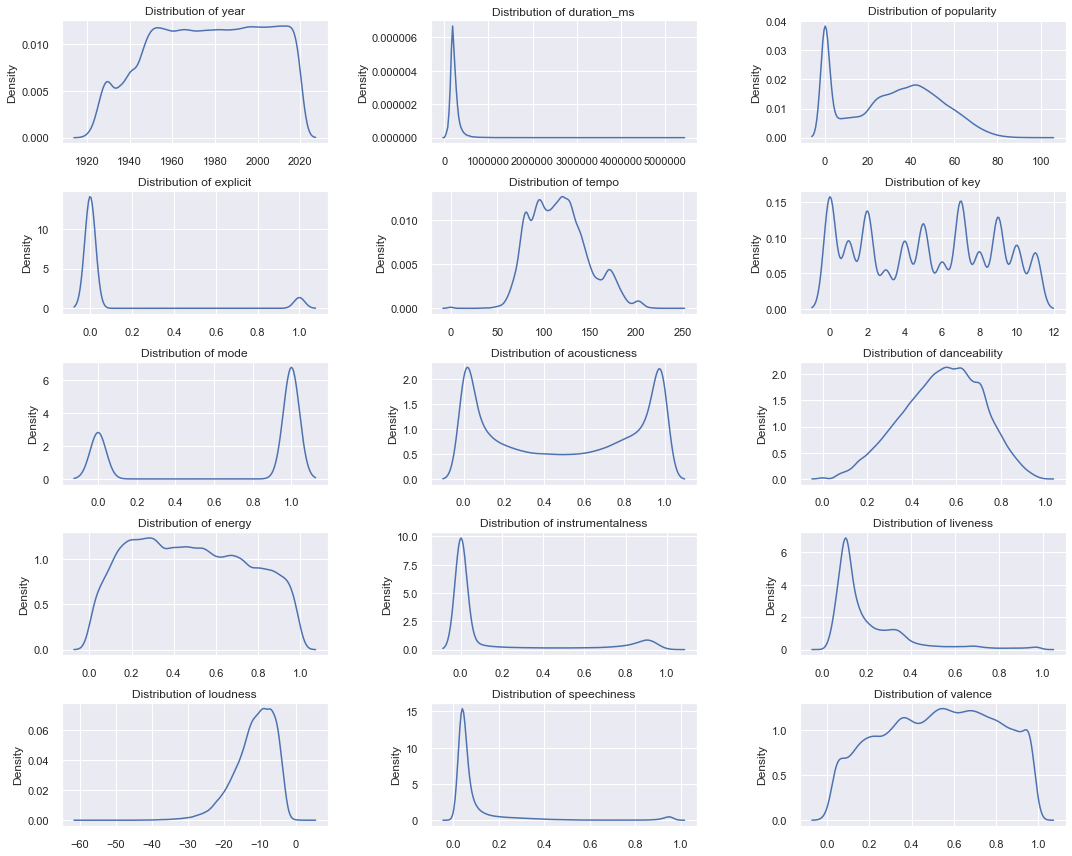

In [16]:
# Analysing and Visualising the Distribution of the Dataset

song_df_2 = song_df.select_dtypes([int,float])
fig = plt.figure(figsize=(15, 12))
for i,columns in enumerate(song_df_2.columns, 1): 
   ax = plt.subplot(5,3,i)
   sb.kdeplot(x=song_df_2[columns])
   ax.set_xlabel(None)
   ax.set_title(f'Distribution of {columns}')
   plt.tight_layout(w_pad=3)
plt.show()

In [17]:
song_df_3 = song_df.select_dtypes([int,float]) 

for i in song_df_3.columns:
  print(f'Skewness in {i} =',song_df_3[i].skew())

Skewness in year = -0.13924227100675096
Skewness in duration_ms = 7.539192803163262
Skewness in popularity = -0.011690294002623185
Skewness in explicit = 2.9180148022798162
Skewness in tempo = 0.4451824954180912
Skewness in key = 0.005573012609331478
Skewness in mode = -0.9042408914686768
Skewness in acousticness = -0.03315812694624469
Skewness in danceability = -0.2286467798406317
Skewness in energy = 0.11764584737167055
Skewness in instrumentalness = 1.6446675743865165
Skewness in liveness = 2.142782079359721
Skewness in loudness = -1.0432611810984573
Skewness in speechiness = 3.9250200242408413
Skewness in valence = -0.1060944679702731


##### 2. Song Characteristics over Years

We analised how song characteristics were effected by the song release year

Text(0.5, 0, 'Year')

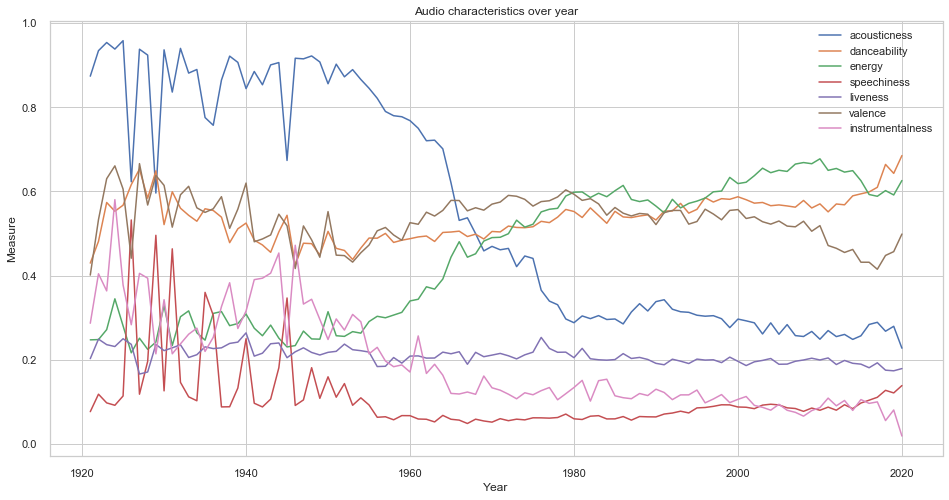

In [18]:
plt.figure(figsize=(16, 8))
sb.set(style="whitegrid")
columns = ["acousticness","danceability","energy","speechiness","liveness","valence","instrumentalness"]
for col in columns:
    x = song_df.groupby("year")[col].mean()
    ax= sb.lineplot(x=x.index,y=x,label=col)
ax.set_title('Audio characteristics over year')
ax.set_ylabel('Measure')
ax.set_xlabel('Year')

/Users/kevingunawan/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


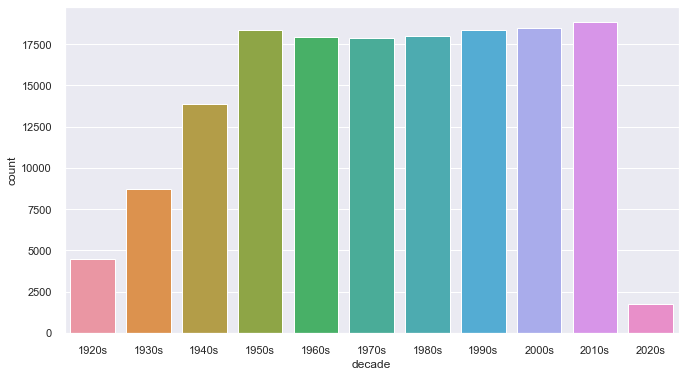

In [19]:
song_df_2= song_df.sort_values('year')

def get_decade(year):
    period_start = int(year/10) * 10
    decade = '{}s'.format(period_start)
    return decade

song_df_2['decade'] = song_df_2['year'].apply(get_decade)

sb.set(rc={'figure.figsize':(11 ,6)})
sb.countplot(song_df_2['decade'])

By observing the graph above, we can understand that the characteristics and popularity of the song varies on each years. Therefore, the song's year should become a parameter for our recommendation system.

##### 3. Song Characteristics of Genres

We study how song characteristics varies on each musical genres.

In [20]:
single_genre_df = song_df.explode('genre_lists')

observed_genres = ['pop', 'classical', 'edm', 'jazz'] 

#select rows that contain the observed genres above  
observed_df = single_genre_df[single_genre_df['genre_lists'].isin(observed_genres)]
observed_df_mean = observed_df.groupby('genre_lists', as_index=False)['valence', 'energy', 'danceability', 'acousticness'].mean()

fig = px.bar(observed_df_mean, x='genre_lists', y=['valence', 'energy', 'danceability', 'acousticness'], barmode='group')
fig.show()

In [21]:
# Cluster the genres dataset with KMeans

single_genre_df = song_df.explode('genre_lists')
single_genre_df_mean = single_genre_df.groupby('genre_lists', as_index=False)['valence', 'energy', 'danceability', 'acousticness', 'instrumentalness', 'loudness', 'speechiness'].mean()

single_genre_df_mean.head()

cluster_pipeline = Pipeline([('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=10, n_jobs=-1))])
X = single_genre_df_mean.select_dtypes(np.number)
cluster_pipeline.fit(X)
single_genre_df_mean['cluster'] = cluster_pipeline.predict(X)

# Visualizing the Clusters with t-SNE

tsne_pipeline = Pipeline([('scaler', StandardScaler()), ('tsne', TSNE(n_components=2, verbose=1))])
genre_embedding = tsne_pipeline.fit_transform(X)
projection = pd.DataFrame(columns=['x', 'y'], data=genre_embedding)
projection['genre_lists'] = single_genre_df_mean['genre_lists']
projection['cluster'] = single_genre_df_mean['cluster']

fig = px.scatter(
    projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'genre_lists'])
fig.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2963 samples in 0.002s...
[t-SNE] Computed neighbors for 2963 samples in 0.114s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2963
[t-SNE] Computed conditional probabilities for sample 2000 / 2963
[t-SNE] Computed conditional probabilities for sample 2963 / 2963
[t-SNE] Mean sigma: 0.421424
[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.205742
[t-SNE] KL divergence after 1000 iterations: 1.085426


Based on the barchart above, we can conclude that each genre has their average unique song characteristics. In addition, the clustering plotted above shows that some genre has similarities with other genres. Hence, we should consider song genre as our recommendation system parameter.

##### 4. Song Characteristic Analysis

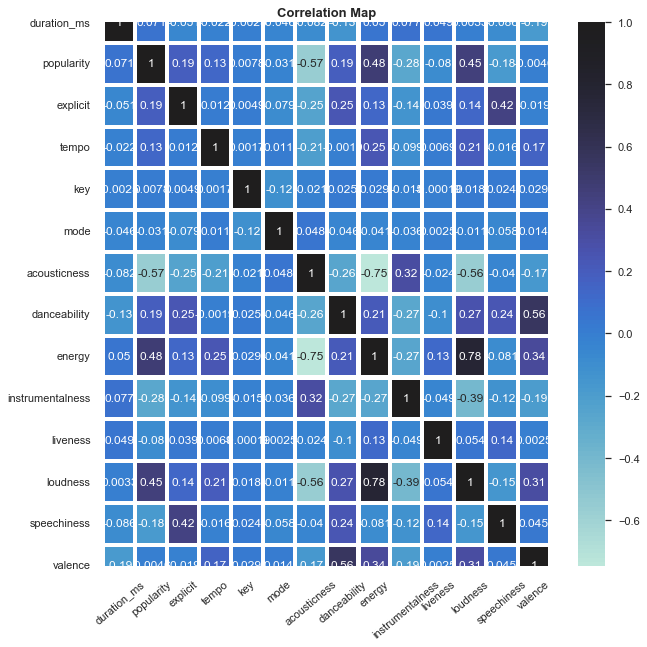

In [22]:
songdetails = song_df.loc[:,'duration_ms':'valence']
plt.figure(figsize=(10,10))
plt.title('Correlation Map',fontsize=13 ,weight='bold')
ax=sb.heatmap(songdetails.corr(),
               linewidth=3.1,
               annot=True,
               center=1)
plt.xticks(rotation=40)
plt.show()

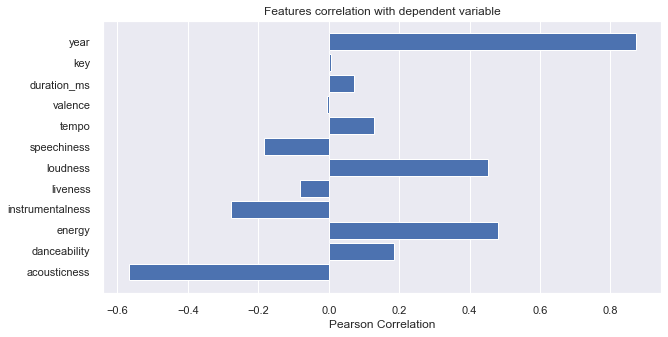

In [23]:
feature_names = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence','duration_ms','key','year']

X, y = song_df[feature_names], song_df['popularity']

# Create a list of the feature names
features = np.array(feature_names)


# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=features)

plt.rcParams['figure.figsize']=(10,5)
visualizer.fit(X, y)     # Fit the data to the visualizer
visualizer.show()

Based on the heatmap above, we can analyse the correlation between song characteristics. The axessubplot visualize the correlation between song characteristic with popularity.

**Choosing sound characteristic column as a Parameter**

As our content-based recommendation algorithm is a unsupervised learning, the parameters to be choosen as a recommendation system parameters is determined by our domain knowledge. We limit our parameters into 6 to minimalise computing power of the algorithm. Here are the list of choosen parameters:
<br>
<ul>
  <li>Valence: To match the mood of the users (happy/unhappy)</li>
  <li>Energy: To match the song energy preference of the users</li>
  <li>Acousticness: To match the preference of the users regarding weather the music is acoustic or not</li>
  <li>Danceability: To match the danceability preference of users</li>
  <li>Explicit: To suit users tolerance to explicit songs</li>
  <li>Instrumentalness: To match the preference of the users regarding weather the music is intrumental or vocal</li>
</ul>


##### 5. Chosen Parameters

Based on the exploratory data analysis above, we select this column as the recommending system parameters:

<ul>
  <li>genre_list	    : Genre of the song</li> 
  <li>year	        : Year of the release</li> 
  <li>valence	        : A measure from 0.0 to 1.0 describing the musical positiveness (degree of happiness feeling) conveyed by a track</li>
  <li>energy	        : Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity</li>
  <li>acousticness	: A confidence measure from 0.0 to 1.0 of whether the track is acoustic</li>
  <li>danceability	: Danceability describes how suitable a track is for dancing</li>
  <li>explicit	    : Explicit detects songs one that has curse words or language or art that is generally deemed sexual, violent, or offensive in nature. 1 indicates that the song is explicit</li>
  <li>instumentalness	: Predicts whether a track contains no vocals. The closer to one, the more confidence level of the track has no vocal</li>
</ul>

In [ ]:
complete_feature_set = create_feature_set(song_df, float_cols=float_cols)

#drop unwanted columns
complete_feature_set.drop(['speechiness', 'loudness', 'liveness'], axis=1)

print(complete_feature_set.shape)
complete_feature_set

(156607, 1739)


name  \
0                                    그아픔까지사랑한거야   
1                          DON'T BREAK MY HEART   
2                                           藝旦調   
3                                         草螟弄雞公   
4                                           思想起   
...                                         ...   
156602  Crush on You (feat. Lil' Cease) - Remix   
156603                     Sunshine (feat. Lea)   
156604             Got Your Money (feat. Kelis)   
156605                Turn Off The Lights - Rap   
156606                          Never Talk Down   

                                               artists  \
0                                              ['조정현']   
1                                               ['黑豹']   
2                                              ['黃國隆']   
3                                       ['黃國隆', '王秋玉']   
4                                              ['黃國隆']   
...                                                ...   
156602                      ["Lil' Kim", "Lil' Cease"]   
156603                            ["Lil' Flip", 'Lea']   
156604  ["Ol' Dirty Bastard", 'Kelis', 'Rich Travali']   
156605      ["World Class Wreckin' Cru", "Michel 'Le"]   
156606      ["Rappin' 4-Tay", 'MC Breed', 'Too $hort']   

                            id     tempo  acousticness  danceability   energy  \
0       2ghebdwe2pNXT4eL34T7pW  0.059119      0.114056      0.090486  0.04300   
1       3KIuCzckjdeeVuswPo20mC  0.164546      0.076506      0.071457  0.13720   
2       4prhqrLXYMjHJ6vpRAlasx  0.070582      0.198193      0.048785  0.00874   
3       5xFXTvnEe03SyvFpo6pEaE  0.102069      0.171084      0.143927  0.02220   
4       6Pqs2suXEqCGx7Lxg5dlrB  0.102389      0.154819      0.123482  0.03500   
...                        ...       ...           ...           ...      ...   
156602  2LP2uDQQ7eLMcUVE4aOpAV  0.072936      0.056627      0.151417  0.13860   
156603  4s0o8TJHfX9LLHa0umnOzT  0.077173      0.004980      0.164777  0.07740   
156604  6YYd5MLpu45J0uLrMdivF7  0.084630      0.010361      0.189069  0.09180   
156605  3hoiinUc5VA9xUEJID7R8V  0.106206      0.005000      0.144737  0.09800   
156606  78859Af0fmA9VTlgnOHTAP  0.078880      0.002269      0.181579  0.08280   

        instrumentalness  liveness  loudness  speechiness  valence  exp|0  \
0           2.320000e-07   0.01298  0.136315     0.005608   0.0354      1   
1           0.000000e+00   0.01136  0.159414     0.008144   0.0704      1   
2           9.060000e-05   0.05300  0.110967     0.009134   0.0916      1   
3           0.000000e+00   0.01390  0.122963     0.014371   0.1592      1   
4           0.000000e+00   0.00618  0.124557     0.008639   0.1408      1   
...                  ...       ...       ...          ...      ...    ...   
156602      0.000000e+00   0.02460  0.163395     0.057320   0.1536      1   
156603      0.000000e+00   0.02620  0.157021     0.019485   0.1584      0   
156604      0.000000e+00   0.04440  0.163953     0.038969   0.1394      0   
156605      3.400000e-05   0.02780  0.158158     0.009876   0.0858      1   
156606      2.200000e-05   0.02020  0.161460     0.050722   0.0546      0   

        exp|1  genre|150  genre|21st  genre|432hz  genre|abstract  \
0           0        0.0         0.0          0.0             0.0   
1           0        0.0         0.0          0.0             0.0   
2           0        0.0         0.0          0.0             0.0   
3           0        0.0         0.0          0.0             0.0   
4           0        0.0         0.0          0.0             0.0   
...       ...        ...         ...          ...             ...   
156602      0        0.0         0.0          0.0             0.0   
156603      1        0.0         0.0          0.0             0.0   
156604      1        0.0         0.0          0.0             0.0   
156605      0        0.0         0.0          0.0             0.0   
156606      1        0.0         0.0          0.0             0.0   

      

### Feature Engineering

Based on previous analysis, we continue preparing the dataset into suitable format.

In [24]:
song_df['year'] = song_df['release_date'].apply(lambda x: x.split('-')[0])
song_df.head()

,name,artists,year,release_date,id,genre_lists,duration_ms,popularity,explicit,tempo,key,mode,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence
0,그아픔까지사랑한거야,['조정현'],1989,1989-06-15,2ghebdwe2pNXT4eL34T7pW,[classic korean pop],237688,31,0,71.979,10,1,0.568,0.447,0.2150,0.000001,0.0649,-16.478,0.0272,0.177
1,DON'T BREAK MY HEART,['黑豹'],1992,1992-12-22,3KIuCzckjdeeVuswPo20mC,"[chinese indie rock, chinese indie]",316160,35,0,200.341,11,1,0.381,0.353,0.6860,0.000000,0.0568,-9.103,0.0395,0.352
2,藝旦調,['黃國隆'],1963,1963-05-28,4prhqrLXYMjHJ6vpRAlasx,[],193480,23,0,85.936,5,1,0.987,0.241,0.0437,0.000453,0.2650,-24.571,0.0443,0.458
3,草螟弄雞公,"['黃國隆', '王秋玉']",1963,1963-05-28,5xFXTvnEe03SyvFpo6pEaE,[],145720,23,0,124.273,2,0,0.852,0.711,0.1110,0.000000,0.0695,-20.741,0.0697,0.796
4,思想起,['黃國隆'],1963,1963-05-28,6Pqs2suXEqCGx7Lxg5dlrB,[],208760,23,0,124.662,7,1,0.771,0.610,0.1750,0.000000,0.0309,-20.232,0.0419,0.704


In [25]:
float_cols = song_df.dtypes[song_df.dtypes == 'float64'].index.values

In [26]:
#ohe_cols = 'popularity'

In [27]:
# reduce popularity index
#song_df['popularity'].floordiv(5)
# tfidf can't handle nulls so fill any null values with an empty list
song_df['genre_lists'] = song_df['genre_lists'].apply(lambda d: d if isinstance(d, list) else [])

In [28]:
#simple function to create OHE features
#this gets passed later on
def ohe_prep(df, column, new_name): 
    tf_df = pd.get_dummies(df[column])
    feature_names = tf_df.columns
    tf_df.columns = [new_name + "|" + str(i) for i in feature_names]
    tf_df.reset_index(drop = True, inplace = True)    
    return tf_df

In [29]:
#function to build entire feature set
def create_feature_set(df, float_cols):
    
    #tfidf genre lists
    tfidf = TfidfVectorizer()
    tfidf_matrix =  tfidf.fit_transform(df['genre_lists'].apply(lambda x: " ".join(x)))
    genre_df = pd.DataFrame(tfidf_matrix.toarray())
    genre_df.columns = ['genre' + "|" + i for i in tfidf.get_feature_names()]
    genre_df.reset_index(drop = True, inplace=True)

    explicity_ohe = ohe_prep(df, 'explicit','exp')    
    year_ohe = ohe_prep(df, 'year','year') * 0.5
    #popularity_ohe = ohe_prep(df, 'popularity','pop') * 0.15

    #scale float columns
    floats = df[float_cols].reset_index(drop = True)
    scaler = MinMaxScaler()
    floats_scaled = pd.DataFrame(scaler.fit_transform(floats), columns = floats.columns) * 0.2

    #concanenate all features
    final = pd.concat([df['name'], df['artists'], df['id'], floats_scaled, explicity_ohe, genre_df, year_ohe], axis = 1)

    return final

In [30]:
complete_feature_set = create_feature_set(song_df, float_cols=float_cols)

#drop unwanted columns
complete_feature_set.drop(['speechiness', 'loudness', 'liveness'], axis=1)

print(complete_feature_set.shape)
complete_feature_set

(156607, 1739)


name  \
0                                    그아픔까지사랑한거야   
1                          DON'T BREAK MY HEART   
2                                           藝旦調   
3                                         草螟弄雞公   
4                                           思想起   
...                                         ...   
156602  Crush on You (feat. Lil' Cease) - Remix   
156603                     Sunshine (feat. Lea)   
156604             Got Your Money (feat. Kelis)   
156605                Turn Off The Lights - Rap   
156606                          Never Talk Down   

                                               artists  \
0                                              ['조정현']   
1                                               ['黑豹']   
2                                              ['黃國隆']   
3                                       ['黃國隆', '王秋玉']   
4                                              ['黃國隆']   
...                                                ...   
156602                      ["Lil' Kim", "Lil' Cease"]   
156603                            ["Lil' Flip", 'Lea']   
156604  ["Ol' Dirty Bastard", 'Kelis', 'Rich Travali']   
156605      ["World Class Wreckin' Cru", "Michel 'Le"]   
156606      ["Rappin' 4-Tay", 'MC Breed', 'Too $hort']   

                            id     tempo  acousticness  danceability   energy  \
0       2ghebdwe2pNXT4eL34T7pW  0.059119      0.114056      0.090486  0.04300   
1       3KIuCzckjdeeVuswPo20mC  0.164546      0.076506      0.071457  0.13720   
2       4prhqrLXYMjHJ6vpRAlasx  0.070582      0.198193      0.048785  0.00874   
3       5xFXTvnEe03SyvFpo6pEaE  0.102069      0.171084      0.143927  0.02220   
4       6Pqs2suXEqCGx7Lxg5dlrB  0.102389      0.154819      0.123482  0.03500   
...                        ...       ...           ...           ...      ...   
156602  2LP2uDQQ7eLMcUVE4aOpAV  0.072936      0.056627      0.151417  0.13860   
156603  4s0o8TJHfX9LLHa0umnOzT  0.077173      0.004980      0.164777  0.07740   
156604  6YYd5MLpu45J0uLrMdivF7  0.084630      0.010361      0.189069  0.09180   
156605  3hoiinUc5VA9xUEJID7R8V  0.106206      0.005000      0.144737  0.09800   
156606  78859Af0fmA9VTlgnOHTAP  0.078880      0.002269      0.181579  0.08280   

        instrumentalness  liveness  loudness  speechiness  valence  exp|0  \
0           2.320000e-07   0.01298  0.136315     0.005608   0.0354      1   
1           0.000000e+00   0.01136  0.159414     0.008144   0.0704      1   
2           9.060000e-05   0.05300  0.110967     0.009134   0.0916      1   
3           0.000000e+00   0.01390  0.122963     0.014371   0.1592      1   
4           0.000000e+00   0.00618  0.124557     0.008639   0.1408      1   
...                  ...       ...       ...          ...      ...    ...   
156602      0.000000e+00   0.02460  0.163395     0.057320   0.1536      1   
156603      0.000000e+00   0.02620  0.157021     0.019485   0.1584      0   
156604      0.000000e+00   0.04440  0.163953     0.038969   0.1394      0   
156605      3.400000e-05   0.02780  0.158158     0.009876   0.0858      1   
156606      2.200000e-05   0.02020  0.161460     0.050722   0.0546      0   

        exp|1  genre|150  genre|21st  genre|432hz  genre|abstract  \
0           0        0.0         0.0          0.0             0.0   
1           0        0.0         0.0          0.0             0.0   
2           0        0.0         0.0          0.0             0.0   
3           0        0.0         0.0          0.0             0.0   
4           0        0.0         0.0          0.0             0.0   
...       ...        ...         ...          ...             ...   
156602      0        0.0         0.0          0.0             0.0   
156603      1        0.0         0.0          0.0             0.0   
156604      1        0.0         0.0          0.0             0.0   
156605      0        0.0         0.0          0.0             0.0   
156606      1        0.0         0.0          0.0             0.0   

      

### Machine Learning Model

In [31]:
class Rec:
    """ Class to generate recommendation based on inputed songs """
    
    # input is in form of array of song ids
    def __init__(self, input, df=song_df, feature=complete_feature_set):
        self.input = input
        self.df = df
        self.input_feature = feature[(feature['id'].isin(input))]
        self.non_input_feature = feature[feature.id.isin(input) == False]
        self.rec = None
       
    """ Show dataframe of inputed songs """ 
    def input_df(self):   
        return self.df[(self.df['id'].isin(self.input))]
    
    """ Produce n-number of song recommendation based on the inputs """
    def show_rec(self, n):
        # delete name, artist and id column on input feature
        input_vector_remove_str = self.input_feature.drop(['name', 'artists', 'id'], axis = 1)
        input_vector = input_vector_remove_str.sum(axis = 0) # sum all vectors into one vector
        
        # delete name and artist column from non input feature
        non_input_vectors = self.non_input_feature.drop(['name', 'artists'], axis = 1)
        
        # create recommendation data frame
        non_input_df = self.df[self.df['id'].isin(non_input_vectors['id'].values)]
        non_input_df['similarity'] = cosine_similarity(non_input_vectors.drop('id', axis = 1).values, input_vector.values.reshape(1, -1))[:,0]
        non_input_df_top_n = non_input_df.sort_values('similarity',ascending = False).head(n)
        self.rec = non_input_df_top_n
        
        return self.rec
    
    """ Return recommended song average similarity """
    def avg_sim(self):
        average_sim = self.rec["similarity"].sum(axis = 0) / len(self.rec)
        return "Recommended Song Average Similarity: " + str(average_sim)

In [32]:
# input array of song ids
rec1 = Rec(['76fqWMe0buqQoaNTIbLWmr', '2Wo6QQD1KMDWeFkkjLqwx5', '2tnVG71enUj33Ic2nFN6kZ', '0NIC4unbe5KZOp1d9T7OaF', '1DFD5Fotzgn6yYXkYsKiGs'])
# display input dataframe
rec1.input_df()

,name,artists,year,release_date,id,genre_lists,duration_ms,popularity,explicit,tempo,key,mode,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence
14847,Secrets,"['Tiësto', 'KSHMR', 'VASSY']",2015,2015-05-18,0NIC4unbe5KZOp1d9T7OaF,"[edm, pop dance, dance pop, pop, house, broste...",250947,64,0,128.178,11,0,0.000329,0.648,0.812,0.036900,0.0857,-7.585,0.0414,0.122
39276,Roses - Imanbek Remix,"['SAINt JHN', 'Imanbek']",2019,2019-09-13,2Wo6QQD1KMDWeFkkjLqwx5,"[pop dance, rap, pop rap, electro house, melod...",176219,80,1,121.962,8,1,0.014900,0.785,0.721,0.004320,0.2850,-5.457,0.0506,0.894
43869,Ride It,['Regard'],2019,2019-07-26,2tnVG71enUj33Ic2nFN6kZ,"[edm, pop dance, tropical house, pop edm]",157606,87,0,117.948,7,0,0.177000,0.880,0.751,0.000064,0.1060,-4.258,0.0874,0.884
68317,Piece Of Your Heart,"['MEDUZA', 'Goodboys']",2019,2019-02-01,1DFD5Fotzgn6yYXkYsKiGs,"[edm, pop dance, uk dance, pop house, tropical...",152913,82,0,124.080,10,0,0.040400,0.677,0.744,0.000160,0.0740,-6.806,0.0295,0.631
124355,Mammoth,"['Dimitri Vegas & Like Mike', 'Moguai']",2013,2013-03-19,76fqWMe0buqQoaNTIbLWmr,"[edm, belgian edm, pop dance, house, tropical ...",332289,58,0,127.997,11,0,0.001050,0.645,0.850,0.302000,0.3640,-5.952,0.2560,0.471


In [33]:
# create n = 10 number of prediction based on the inputed song
rec1.show_rec(10)

/Users/kevingunawan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,name,artists,year,release_date,id,genre_lists,duration_ms,popularity,explicit,tempo,key,mode,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,similarity
70840,I'm Not Alright,"['Loud Luxury', 'Bryce Vine']",2019,2019-12-20,7fcEMgPlojD0LzPHwMsoic,"[edm, pop dance, dance pop, pop, tropical hous...",187797,64,0,121.978,4,1,0.0810,0.875,0.858,0.000001,0.3810,-3.886,0.0496,0.700,0.945512
38557,Post Malone (feat. RANI),"['Sam Feldt', 'RANI']",2019,2019-08-16,36orMWv2PgvnzXsd5CJ0yL,"[edm, pop dance, dance pop, pop, uk pop, tropi...",174444,74,0,107.356,7,1,0.0771,0.590,0.642,0.000000,0.1050,-3.870,0.1220,0.651,0.934712
65442,Used To Love (with Dean Lewis),"['Martin Garrix', 'Dean Lewis']",2019,2019-10-31,7pWK1kMgHy5lNNiIfuRbkP,"[edm, pop dance, dance pop, pop, tropical hous...",236765,73,0,118.970,4,1,0.4580,0.651,0.693,0.000000,0.3350,-4.722,0.0375,0.392,0.924658
136559,Giant (with Rag'n'Bone Man),"['Calvin Harris', ""Rag'n'Bone Man""]",2019,2019-01-11,5itOtNx0WxtJmi1TQ3RuRd,"[edm, pop dance, dance pop, uk dance, pop, hou...",229184,79,0,122.015,1,0,0.0160,0.807,0.887,0.000503,0.0811,-4.311,0.0361,0.606,0.922983
10996,Roots,"['Valerie Broussard', 'Galantis']",2019,2019-08-16,23FHa9lYnG6Dr8OzombPkS,"[edm, pop dance, dance pop, pop, tropical hous...",184564,67,0,122.997,7,1,0.0643,0.683,0.785,0.000013,0.1770,-4.879,0.0370,0.581,0.919358
14848,Ritual,"['Tiësto', 'Jonas Blue', 'Rita Ora']",2019,2019-05-31,3M9Apu4OZfylLTFKvgEtKa,"[edm, pop dance, post-teen pop, dance pop, uk ...",198996,75,0,114.996,3,0,0.1570,0.647,0.726,0.000000,0.0844,-4.389,0.0552,0.767,0.916851
39184,Never Let You Go,['SNBRN'],2019,2019-05-31,523XDGMjH8Gbzc8V6ek5cl,"[edm, pop dance, bass house, house, tropical h...",210643,61,0,123.996,5,1,0.0188,0.752,0.662,0.093500,0.2120,-6.766,0.0361,0.371,0.916073
100624,Nobody Compares To You (feat. Katie Pearlman),"['Gryffin', 'Katie Pearlman']",2019,2019-10-24,17ejRbr6B8l9zdqgCZsn4m,"[edm, pop dance, dance pop, pop, tropical house]",231291,65,0,104.911,2,1,0.2290,0.590,0.764,0.000000,0.1920,-4.735,0.0467,0.331,0.910788
46368,All Around The World (La La La),"['R3HAB', 'A Touch Of Class']",2019,2019-07-26,1D2Aldrksl9yWWCIPOeDzy,"[edm, pop dance, dance pop, bubblegum dance, p...",147840,65,0,124.948,9,0,0.4790,0.733,0.859,0.064500,0.1050,-5.030,0.0330,0.520,0.909050
68319,Lose Control,"['MEDUZA', 'Becky Hill', 'Goodboys']",2019,2019-10-11,7CHi4DtfK4heMlQaudCuHK,"[edm, pop dance, dance pop, uk dance, pop, hou...",168387,85,0,123.935,10,0,0.1290,0.598,0.526,0.000000,0.1400,-8.659,0.0415,0.529,0.905210


In [34]:
# print the average song similarity between the song inputs and song outputs
rec1.avg_sim()

'Recommended Song Average Similarity: 0.9205195522719054'

The similarity of the song was counted by evaluating cos(θ) with θ being the angle difference between two vectors. The maximum similarity of the recommendation is 1.00 and the minimum similarity is -1.00. Note that for every song inputs, the similarity varies.